# Deep Learning with Keras, CNN

Github link: https://github.com/aisutd/Spring19_Workshop4


This Jupyter notebook contains code and explanations for the 2019 AIS Deep Learning workshop. This tutorial focuses on training neural networks to recognize handwritten digits using the MNIST dataset.

## **WHAT IS DEEP LEARNING?**
<img src='https://www2.argility.com/wp-content/uploads/2018/04/image10.png' height="400" width="400"/>

image source: https://www2.argility.com/wp-content/uploads/2018/04/image10.png




















## What is Deep Learning? What are Neural Networks?
Deep learning is a subfield of machine learning focused on using biologically-inspired models known as **neural networks** to solve a wide range of machine learning problems. At a high-level, neural networks are basically **mathematical models** that are based roughly on neurological concepts in **human learning**. 

## The Three Key Components of Neural Networks
Neural networks can be a slightly challenging concept to grasp since they involve a mix of ideas from math, computer science, and even neuroscience. There is a lot of technical information in this workshop, so I would recommend focusing on gaining a high-level understanding of **three fundamental components** of neural networks:

1. **Structure** - what the neural network looks like, including all the mathematical functions involved, the number of inputs and outputs, and the parameters, called **weights** that the network has to learn.
    
2. **Loss Function** - a metric that tells us how good or bad the network's predictions are. 
3. **Optimizer** - the algorithm used for **learning the weights** that give the network the best predictions.


## About the Fashion - MNIST Dataset 
Fashion-MNIST is a dataset of [Zalando's](https://jobs.zalando.com/tech/)  article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


GITHUB LINK TO THE DATASET 

https://github.com/zalandoresearch/fashion-mnist

Sample Data

<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' width="700" height="700"/>



image source : https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png



Label	Description

0	       T-shirt/top

1	       Trouser

2	       Pullover

3	       Dress

4	       Coat

5	       Sandal

6	       Shirt

7	       Sneaker

8	       Bag

9	       Ankle boot




## Libraries Used

- **Numpy** - for handling linear algebra and numerical computations in machine learning.
- **Matplotlib** - for visualizing data, such as images.
- **TensorFlow** - deep learning library, acts as a backend for Keras
- **Keras** - features a simple API for deep learning.
- **OpenCV(CV2)** - is a library of programming functions mainly aimed at real-time computer vision.
*   **Pandas**- An open-source library with easy to use data structures and data analysis tools for Python.





## Numpy and Matrices
Throughout this tutorial, you will see the concepts of **matrices** and **vectors** involved in the mathematical operations of neural networks. These concepts are fairly straightforward, but it may help to review them and also explain how Numpy allows us to represent matrices and vectors.

### What are vectors?
Vectors are basically sequences of numbers. They may be represented mathematically as shown below.

 $\vec{v} = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$
 
We can use Numpy to represent vectors by creating a **Numpy array** as shown below.

In [0]:
import numpy as np
vector_a = np.array([1, 2, 3])
vector_a

array([1, 2, 3])



### Operations on Vectors - Dot Products
The dot product is an operation where we basically take two vectors, multiply their corresponding elements, and add up all of these products. Here is an example, where we have two vectors $ \vec{v} $ and $\vec u $:

$\vec{v} = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$ 

$\vec{u} = \begin{bmatrix} 2 & 4 & 6 \end{bmatrix}$

$\vec{v} \bullet \vec{u} = (1 \bullet 2) + (2 \bullet 4) + (3 \bullet 6) = 28 $

We can easily compute dot products in Numpy as well.

In [0]:
v = np.array([1, 2, 3])
u = np.array([2, 4, 6])
u.dot(v)

28

### What are matrices?
Matrices are basically 2D tables that store numbers. In a sense, we can say that they are basically **lists** of vectors, with the vectors forming the columns or the rows of the matrix. 

$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

We can also use Numpy to represent the matrix above by passing in a list of lists to the **Numpy array constructor**, with the inner lists representing the rows of the matrix.

In [0]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Operations on Matrices - Matrix Multiplication
Matrix multiplication is an operation that builds upon the concept of a dot product. Multiplying two matrices produces a new matrix where each element of the new matrix is a **dot product** between a **row vector** of the first matrix and a **column vector** of the second matrix. Here is an example, with two small 2 x 2 matrices:

$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} 
\times \begin{bmatrix} 2 & 4 \\ 6 & 8 \end{bmatrix} = 
\begin{bmatrix} (1 \cdot 2) + (2 \cdot 6) & (1 \cdot 4) + (2 \cdot 8) \\ 
(3 \cdot 2) + (4 \cdot 6) & (3 \cdot 4) + (4 \cdot 8) \end{bmatrix} =
\begin{bmatrix} 14 & 20 \\ 30 & 44 \end{bmatrix}$ 



![matrix-multiplication](https://docs.google.com/uc?export=download&id=16TU3tOM0qvOjvgCYrFUiJrA_dI3NVEyU)

In [0]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[2, 4], [6, 8]])
matrix_a @ matrix_b

array([[14, 20],
       [30, 44]])

## **Vector dot product and Matrix Multiplication in Deep Learning **

For really large datasets we need high-performance computers for deep learning because **matrix multiplication is computationally expensive**. We don't need to know how to do these operations by hand because software libraries will take care of that for us, but we should still be aware of these operations.

## Importing Numpy and Matplotlib
Here we will go ahead and import Numpy and Matplotlib, two libraries that are useful for dealing with our image data.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


## Structure of Neural Networks - A Biology and Math Lesson
As we mentioned before neural networks are **biologically inspired** models. For a moment, let's forget about machine learning and review how the human nervous system works to understand where the concept of neural networks came from. A **neuron**, the fundamental unit of this system, looks something like this:

![neuron](https://docs.google.com/uc?export=download&id=1p4GXVP-B0yz7NtpOW82G3AmdUCqU_OFI)

(image source: http://home.agh.edu.pl/~vlsi/AI/intro/)

### Key Parts of the Neuron
A neuron transmits electrical signals that are constantly activated as the human brain learns and recognizes new concepts. The main parts of a neuron that we should take note of are:

- **inputs** - the neuron receives several input signals through **dendrites** from connections to neighboring neurons. 
- **synapses** - gaps between **axons** and **dendrites**. Synapses transfer signals between neurons.
- **body** - the neuron has a cell body that receives all of the incoming signals.
- **axon** - a long connection that transmits an electrical signal **output**.
- **activation threshold** - neurons fire when electrical activity exceeds a certain threshold.


### The Simplest Neural Network - The Perceptron
The perceptron, arguably the simplest neural network, was invented by psychologist Frank Rosenblatt in 1957 and looks something like this:
![perceptron](https://docs.google.com/uc?export=download&id=1SbHK9XPrP1PSO9T-lh9uG9CTCNjdXhU1)

(image source: http://ataspinar.com/2016/12/22/the-perceptron/)

A perceptron is basically a neural network with a single **artificial neuron**. Similar to the biological neuron, a perceptron has the following characteristics:

- **inputs** - the perceptron receives a given number of real-valued inputs (the inputs are numbers).
- **weights** - the perceptron has a weight $ w_i $ associated with each input $ x_i $. These weighted connections are like synapses and they are parameters that the perceptron must "learn".
- **weighted sum (basically a dot product)** - the inputs are multiplied by the weights and the results are added together to produce a weighted sum.
- **activation function** - the perceptron has an activation function called the unit-step function that produces an output of 1 if the weighted sum is greater than some threshold $\theta$ and -1 otherwise.

### The Math Behind the Perceptron Output
Given a vector of inputs $x = (x_0, x_1, ..., x_n) $, a set of weights $w = (w_0, w_1, ..., w_n) $, and an activation threshold $\theta$ the output of a perceptron is given by the following function:

$$ f(x) = \begin{cases} 1 & \  \mbox{if} \  w \cdot x \geq \theta  \\ -1 & \text{otherwise} \end{cases} $$

### Example with Real Numbers
![perceptron_example](https://docs.google.com/uc?export=download&id=1N1aizUfyLNYASghAaYhOD47fMvsigQBm)

### What kind of problems can the Perceptron solve?
The Perceptron is designed to solve **binary classification problems**. By learning the best weights for a given problem, the Perceptron can be used to classify a set of inputs into one of two possible outputs. However, the Perceptron is very limited in scope because not only is it limited to solving binary classification problems, but it can only find the optimal weights for **linearly separable** binary classification problems. These are problems where a straight line or multi-dimensional hyperplane can simply separate the two classes.

![perceptron_limitation](https://docs.google.com/uc?export=download&id=1enqoFHbVPoQE8JS1sCjt7Ae-8gk_1ut0)

(image source: http://qingkaikong.blogspot.com/2016/11/machine-learning-5-artificial-neural.html)

### Deep Neural Networks - Densely Connected Hidden Layers
Deep neural networks are much more complex than the simple perceptron and feature multiple layers of neurons and several **densely connected hidden layers** between the input and output layers. Here is what a deep neural network looks like:

![deep_net](https://docs.google.com/uc?export=download&id=1CHivQC9q4azyM3z95G3zQY5-onsPWxTb)

Looking at the example above we can see that the neural network has an **input layer** with **three inputs**, two **hidden layers**, and an **output layer** with a **single output**.

#### What is a densely connected layer?
In a densely connected layer, each neuron from the group of neurons on the left is connected to every other neuron from the group of neurons on the right. In the example above, **hidden layer 1** is densely connected because every neuron from the **input layer** is connected to every neuron in **hidden layer 1**. Each connection between the layers has a numerical weight attached to it.

Here is an example with real numbers. Notice that the value in each of the output neurons is the **weighted sum** of the values from the **incoming inputs**.

![hidden_layer_examples](https://docs.google.com/uc?export=download&id=1rJ8j-u54b_Jj1-oQ4gAwo4267fsIObkB)

The computation that we did above is basically just a matrix multiplication.

$\begin{bmatrix} 1 & 2 \end{bmatrix} 
\times \begin{bmatrix} 1 & 0.5 & 2 \\ 1 & 0.5 & 2 \end{bmatrix}
= \begin{bmatrix} 3 & 1.5 & 6 \end{bmatrix}$

The matrix multiplication above is basically:
$ inputs \times weights = outputs $
 
#### The Sigmoid Activation Function
After multiplying the weights from the input layer by the inputs and computing the sum in each output neuron we still have one more step left to do, and that is applying an activation function to the outputs. In the Perceptron example, we used a unit-step function as our activation function, but for deep neural networks, we can introduce another activation function, called the **sigmoid or logistic function**. The function is defined mathematically by the following equation:
 
\begin{equation*}
\phi (z) = \frac {1} {1+e^{-z}}
\end{equation*}

What's special about this function is that it is really useful for representing **probabilities** since it takes **any real number as input** and **outputs a value between 0 and 1**. Take a look at a graph of the function below to see what this concept looks like:

![sigmoid_graph](https://docs.google.com/uc?export=download&id=1dMZ5Mhn0jQDQZ_SW4DBau_OBl6xlROhF)

If we were to apply the **sigmoid activation function** to our hidden layer in the previous example, the final values would look like this:

![sigmoid_activation_applied](https://docs.google.com/uc?export=download&id=1goOUYMUIOBNdIJqHflqdPgvM7PhhRmWy)

#### The Softmax Activation Function
Another activation function, which we usually see at the final or output layer of neural networks is the **softmax activation function**. Unlike the sigmoid activation function, which takes a single value as input, the **softmax function** takes a **vector as input** and produces a **vector of the same shape as the output**. In a way, this function basically acts on an entire layer. The softmax function basically converts a vector of real values into a **probability distribution** and is useful for representing the probabilities of different classes. This function is defined mathematically below:

Given a vector $z = (z_{1}, z_{2}, ..., z_{n})$, the result of applying softmax $\sigma(z)$, is defined as:

$$ \sigma(z)_{i} = \frac{e^{z_{i}}}{\sum_{j=1}^n e^{z_{j}}}$$

In **plain english**, what the equation above really means is that to get the softmax of a vector, **we raise $e$ to the power of each value in the vector and sum up the results**. Then for each value, **we raise $e$ to the power of that value and divide it by this sum**. This process guarantees that all of the values will **sum up to 1**. (Note that the natural constant $e$, is approximately equal to 2.71828)

#### An Example with Real Numbers 
If we took the values from our output layer in the previous example before applying sigmoid and instead applied softmax, we would calculate the softmax as follows:

Our input vector is $z = \begin{bmatrix} 3 & 1.5 & 6 \end{bmatrix}$. If we calculate the sum of raising $e$ to the power of each value, we get $e^3 + e^{1.5} + e^6 \approx 427.996$. Now for each value we just raise $e$ to the power of that value and divide it by our previous sum. 

$$\frac{e^{3}}{427.996} \approx 0.04692926$$

$$\frac{e^{1.5}}{427.996} \approx 0.01047133$$

$$\frac{e^{6}}{427.996} \approx 0.94259941$$


So the final result is $\sigma(z) = \begin{bmatrix} 0.04692926 & 0.01047133 & 0.94259941\end{bmatrix}$

#### Why Softmax??
Softmax is useful because it allows us to represent probabilities. In our problem, we have ten possible digits that an image can correspond to. Sometimes there is a little bit of uncertainty involved in the category that an image belongs to and even humans can see this when we can't tell if someone has drawn a one or a seven. For this problem, we want our neural network to produce not one but **ten outputs** with each output corresponding to the **probability** of an image corresponding to a specific digit. The following example image is not specific to the MNIST problem, but demonstrates the idea of using softmax for probabilities: 

![softmax_dog_cat](https://docs.google.com/uc?export=download&id=18Z83xA4IA3aTm_KTqOQUtQ2U6PUh0sCe)

(image source: https://www.superdatascience.com/convolutional-neural-networks-cnn-softmax-cross-entropy/)

### Defining the Structure of a Neural Network for the Fashion MNIST Problem
Now that we understand the parts of a deep neural network, we can design one for our problem. 

#### Inputs
Each image in the dataset is 28 x 28 pixels. Because the input for deep neural networks that we have described must vectors, we will have to flatten each image from 28 x 28 pixels to a vector of 784 pixel values. 

![MNIST-flatten](https://docs.google.com/uc?export=download&id=1TATTUqMb6Q9WeMi8XrIeqYpkYJ0r-pYj)

#### Hidden Layers
Our input layer contains 784 values. We can stack two hidden layers together after this input layer, with the first one having 784 neurons and the second one having 800 neurons. We can add a sigmoid activation to each layer. After this our network design looks something like this:

![input+hidden_layers](https://docs.google.com/uc?export=download&id=1zwZPfVsfOOH-awl0A2eYOeRcpLGNGcjB)

#### Softmax Output
Finally, we can add a densely connected output layer with 10 neurons and apply a softmax activation to it. The final network design looks like this:

![final_dnn_design](https://docs.google.com/uc?export=download&id=1ePuVGrNaI4J0BwZ7-pjRjGdlaZ81Seis)


##**Keras**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
np.random.seed(35)

##** Reading data and shape info**

The code is going to download 4  parts of the dataset:
- **X_train** - the training images, which consist of 60,000 grayscale images represented as matrices with values corresponding to the darkness of each pixel.
- **y_train** - the training labels, which consist of 60,000 digits ranging from 0 to 9.
- **X_test** - the test images, which consist of 10,000 grayscale images represented as matrices.
- **y_test** - the test labels, which consist of 10,000 digits ranging from 0 to 9.

Let's take a look at the shapes of these four parts of our data, which are all **represented as Numpy arrays**.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Our training image set is basically a 3D stack of 60,000 28 x 28 pixel images and similarly, our test image set is a stack of 10,000 images of the same shape.

In [0]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Text(0.5, 1.0, '9')

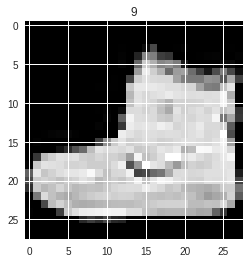

In [0]:
plt.imshow(X_train[0], cmap='gray') # the cmap argument allows us to view this as a grayscale image
plt.title(y_train[0]) #category of the object in the image. 9 = Ankle Boot

In [0]:
#X_train = X_train.reshape(60000,784)
#X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#We scale these values to a range of 0 to 1 before feeding to the neural network model. 
#For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

X_train/=255
X_test/=255

### Preparing Our Data for the Neural Network
Because our original data consisted of just single values for the labels, we now want to turn our labels into categorical **one-hot vectors** with 10 values. In a **one-hot vector** all of the elements are zero except for one which has a value of 1 in the position of the correct class. Let's perform this transformation with Keras and see the result on a single variable.

In [0]:
number_of_classes = 10 # Labelling starts with 0; hence numbering will be 0-9

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0] 

#y_train has original label Y_train has vector after one hot encoder.
#Hence label 9 has 1 at position in vector rest all values are set to zero.


(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

## Convolutional Neural Networks (CNNs)
Convolutional neural networks (CNNs) are designed for image data and inspired by local regions of activity in the visual cortex. The main innovation in CNNs lies in their ability to effectively recognize patterns in spatial data. 

Recall that in the previous section we had to flatten the images and give our deep neural network 784 pixel vectors as input. However, CNNs can work with 2D input structures such as images using **convolutional layers**.

### Convolutional Layers
The **convolutional layer** is the fundamental unit of CNNs. This layer passes over local two-dimensional regions in the image and performs a **convolution** operation on each region. The **convolution** operation displayed below is similar to multiplying weights except it operates on matrices instead of vectors.

![convolution operation](https://docs.google.com/uc?export=download&id=1POU_9SZQmCeYJLisYpr-qy55DTdw5lpm)

(image source: http://www.davidsbatista.net/blog/2018/03/31/SentenceClassificationConvNets/)

In the image above the convolution operation involves taking a **3 x 3 subsection of the input image** and multiplying it by a **3 x 3 kernel of weights** and summing the products to produce a single element in the output. This operation is kind of like a 2D dot product and is repeated by sliding the **kernel** or **convolution filter** with a fixed **stride** such as 1 pixel length, across the image until all input pixels have been covered. The GIF below demonstrates this concept:

![conv_stride](https://docs.google.com/uc?export=download&id=1x8WthFeglNI5CXDQQ2WnraztzeTIsA1_)

(GIF source: https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)

A convolution filter basically looks for certain **features** in an image such as corners, curves, or circles. The **output** of sliding a convolution filter across an input image is a **feature map**, which is kind of like an image in terms of its dimensionality. A single convolution layer can have **multiple filters** that each look for different features. The size of the filter (in this case 3 x 3) is often referred to as the **kernel size**.

#### ReLU Activation Function
Convolutional layers typically use the **ReLU (Rectified Linear Unit) activation function** which is really simple and represented by the following equation: $ R(z) = max(0, z) $. If we graph this function it looks like this:

![relu](https://docs.google.com/uc?export=download&id=1qVCnvxjUxGwGgKzL98sv0odwJg6WOlXH)


### Max Pooling Layers
Max pooling is another operation commonly found in CNNs. Max pooling is just a form of downsampling where we select the maximum pixel value from a 2D section of a feature map. The image below demonstrates the concept of max-pooling.

![maxpool](https://docs.google.com/uc?export=download&id=1-hhVrOWdC2jAVcXUTJZqzmiGUreSxGdF)


#### Why Max Pool? 
Why do we even do downsampling with max-pooling? **François Chollet**, the author of Keras (!) gives the following explanation in **"Deep Learning with Python"**: 

“The reason to use downsampling is to reduce the number of feature-map coefficients to process, as well as to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).”

Basically, max-pooling reduces computation time and creates creates a hierarchical structure for detecting features when we stack multiple convolutional layers together.

### Structure of CNNs
Generally CNNs begin with stacks of several convolutional and max pooling layers, which are then followed by a layer that flattens the resulting feature maps into a single vector, and then a series of typical densely connected layers. 

![cnn_structure](https://docs.google.com/uc?export=download&id=1slsGG86wPW4HSYYuoxCs5Vv0-l_1KesW)

### Cool Visualization 
Here is a nice visualization if you want to see what actually happens to images inside of CNNs.
http://scs.ryerson.ca/~aharley/vis/conv/

### Introducing Dropout - Controlling Overfitting
In the final dense (fully-connected layers) of a CNN, we may typically see thousands of neurons. These large layers are good at learning patterns but can sometimes learn them too well, to the point where they memorize features unique to the training data and fail to generalize to the validation data. This is called **overfitting**. We can control overfitting by introducing **dropout** into these final layers. With **dropout**, during training we randomly remove the effect of certain neurons by **setting their activations to zero**. Note that this is just as good as removing these neurons temporarily. This prevents the network from relying too much on a few specific features and forces it to learn general patterns. We can specify the probability of dropping neurons in dropout layers in Keras.

![dropout](https://docs.google.com/uc?export=download&id=1EgV9UVSWj50udMOqst3rb85HX_vke7Bo)

In [0]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, input_dim=784))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

## Loss Functions - Evaluating a Neural Network's Predictions
In the previous sections, all we did was define the structure of our neural network. Our network has over a million weights, but all of this means nothing if it can't learn the right weights for our problem. This brings us to what we can call the **Universal Deep Learning Problem**, an optimization problem that we try to solve in all supervised deep learning tasks (the term isn't actually real, I just made it up for the purpose of this workshop).

### The Universal Deep Learning Problem
Given a supervised machine learning task (eg. image classification), find a way to make the neural network **learn the weights** that allow it to make the **best predictions** of the desired outputs given inputs for that task.

### Quantifying "Best Predictions" Using a Loss Function
If we want our network to learn the weights that generate the **best predictions** we first have to quantitatively define the "goodness" or "badness" of our predictions. This is where loss functions come in. A loss function is basically a function that takes two arguments - some predicted values and the correct values, and measures **how bad** the predictions are. A **higher loss value** means **worse predictions** and a **lower loss value means better predictions**. 

### Categorical Cross Entropy - A Loss Function for Softmax Outputs
Recall that our network outputs a probability distribution with ten probabilities, one for each possible digit. The correct output, which we want ot compare our predictions with is a one-hot vector, which is basically a series of ten values with a 1 in the index of the correct digit, and 0's everywhere else. Clearly, we want to predict the highest probability for the correct digit and lower probabilities for incorrect digits. The **categorical cross entropy** function allows us to quantify the difference between the assigned probabilities and the actual labels. 

$$ crossentropy(y, \hat{y}) = - \sum_{i} y_{i} \log \hat{y_{i}}$$

In plain English, all this equation really says is that to calculate the cross entropy we take each element of $y$, the correct labels multiply it by the log of the corresponding element in $\hat y$ (our predicted probabilities) and sum up all these products and multiply by -1 to get the loss.

#### Example with Numbers
Let's say we are dealing with a binary classification task and we get $ y = [1, 0] $ and $ \hat y = [0.5, 0.5] $, meaning that we predicting an equal probability for each class. The cross entropy is then calculated like this:

$$ crossentropy(y, \hat{y}) = -[(1 \cdot \log 0.5) + (0 \cdot \log 0.5)]  \approx 0.6931$$

## Optimization Algorithms - Minimizing the Loss and Learning Weights
Every supervised deep learning problem is an optimization problem where the network has to **learn the weights** that **minimize the loss**.

### Intuition Behind Optimization Algorithms
In deep learning, optimization algorithms tend to follow the same set of steps, which are listed below:

Step 0: Set the weights to small random values.

1. Get a single sample or a batch of **training examples**.
2. Have the neural network **generate predictions** for those examples.
3. **Calculate the loss** for those predictions.
4. **Update the weights** to reduce the loss.
5. **Repeat steps 1-4** for some number of iterations or until satisfied with the neural net's performance.

The only step that really differs between different learning algorithms is step 4. This step is where most of the math is involved and it is also perhaps the most important step.

### (Stochastic) Gradient Descent - A Basic Optimization Algorithm
**Gradient descent** is one of the simplest optimization algorithms and usually the first one that most people studying deep learning actually learn about. To understand the idea behind this algorithm picture a scenario where you are **walking through a valley** and you are trying to get to the **lowest point** in the valley.

![valley](https://docs.google.com/uc?export=download&id=16hqurC46z3kUA1XKfGUmZmJAjxhkqIQG)

Intuitively, it would make sense to look at where the path in front of you is headed and keep walking downhill rather than uphill to try to reach the bottom of the valley. This is sort of how gradient descent works. If we relate this concept back to the **universal deep learning problem**, the valley becomes the **graph of our cost function** and we can use a little bit of calculus to figure out if the cost function is going **downhill** or **uphill**.


### Other Optimization Algorithms
There are many other optimization algorithms used in deep learning but we won't cover them all in great detail because they are out of the scope of this workshop. Some of the most common algorithms include:

- RMSProp
- Adagrad
- Adadelta
- Adam

Any algorithm that begins with 'Ada' is an algorithm that adapts the learning rate over time. Adam is a popular default to start with and it generally gives good results for most problems.

### Adding a Loss Function and Optimizer to the Neural Network
Now that we know about optimizers and loss functions let's add a loss function and optimizer to our deep learning model.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # adds extra dimension
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) # adds extra dimension

In [0]:
size = int(len(X_train) * 0.8)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

**Data Augumentation**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set.  There are many ways to augment existing datasets and produce more robust models.

You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.


Documentation link: 



https://keras.io/preprocessing/image/

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=2,
    horizontal_flip=True)

datagen.fit(X_train)

In [0]:
X_train.shape

(60000, 28, 28, 1)

## Training the Neural Network
Now that we have selected an optimizer and specified a loss function in Keras we can finally start training the network. When training a network, we have to specify the following parameters:

- **Training data**: These are the first two arguments and represent the training images and the training labels. In this case these are X_train and y_train.
- **Validation data**: Some additional data to test on while training the model.
- **batch_size**: A batch is a set of shuffled training examples from the data that we use to make a single weight update. We can specify how big we want the batches to be.
- **epochs**: An epoch is a unit of training time that represents a single pass through the training data. For example, if our training data has **50,000 images** and we use a **batch size of 50**, then an **epoch** is complete after going through **1,000 batches**.

The nice thing about Keras is that we can monitor both the loss and the accuracy and see these values changing in real time during the training process! 

In [0]:
model.fit_generator(datagen.flow(train_x, train_y, batch_size=32), steps_per_epoch=len(train_x)/32, epochs=10, validation_data=(val_x, val_y))

Epoch 1/10
1500/1500 [==============================] - 23s 15ms/step - loss: 1.0690 - acc: 0.5893 - val_loss: 0.7011 - val_acc: 0.7201
Epoch 2/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.8791 - acc: 0.6640 - val_loss: 0.7069 - val_acc: 0.7116
Epoch 3/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.8277 - acc: 0.6826 - val_loss: 0.6520 - val_acc: 0.7352
Epoch 4/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.8009 - acc: 0.6906 - val_loss: 0.6255 - val_acc: 0.7559
Epoch 5/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.7842 - acc: 0.6985 - val_loss: 0.6151 - val_acc: 0.7579
Epoch 6/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.7611 - acc: 0.7067 - val_loss: 0.6626 - val_acc: 0.7450
Epoch 7/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.7538 - acc: 0.7106 - val_loss: 0.6130 - val_acc: 0.7608
Epoch 8/10
1500/1500 [==========================

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
model = Sequential()
model.add(Conv2D(kernel_size=(3, 3), filters=32, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(kernel_size=(3, 3), filters=32, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
model.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit_generator(datagen.flow(X_train, Y_train, batch_size=256), validation_data=(X_test, Y_test), steps_per_epoch=len(X_train)/256, epochs=5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)              0         
__________

## **Model Evaluation and Result Prediction**

model.evaluate() will evaluate model on test data.

In [0]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 54us/step

Test accuracy:  0.8905


**model.predict** returns a list of lists, one for each image in the batch of data. 

We can predict the class for new data instances using our finalized classification model in Keras using the **predict_classes()** function. Note that this function is only available on Sequential models, not those models developed using the functional API.





In [0]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)


#predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predictions == y_test)[0]
incorrect_indices = np.nonzero(predictions != y_test)[0]


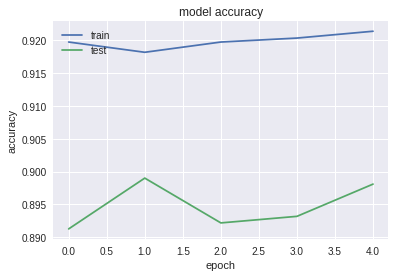

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

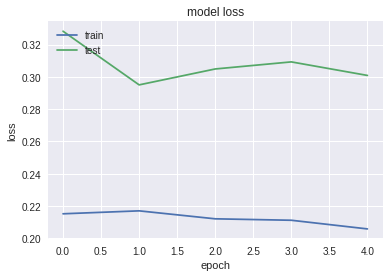

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

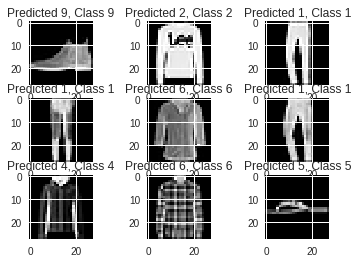

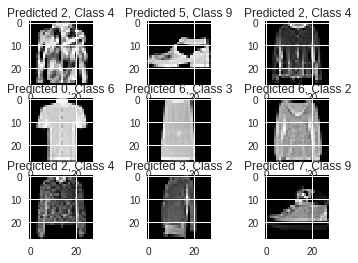

In [0]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[incorrect], y_test[incorrect]))

## Good Resources for Deep Learning and Machine Learning

**Deep learning Tutorial**: https://www.tensorflow.org/tutorials/keras/basic_classification

**Keras Documentation**: https://keras.io/


Stanford CS231n course with lecture videos on YouTube: http://cs231n.github.io/

**Python Machine Learning** by Sebastian Raschka

**Andrew Ng's Coursera course** https://www.coursera.org/learn/machine-learning

**Machine Learning Mastery** - has a lot of good free articles with working code.


## Questions?

## Contact
AIS: contact@aisutd.org

## Feedback Form: How can we do better?
